<a href="https://colab.research.google.com/github/aguilarafa2010/RNN-LSTM/blob/main/Vale_UniVal_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recurrent Neural Network for VALE**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importa bibliotecas necessárias 

from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

In [3]:
x = pd.read_csv("/content/drive/MyDrive/ML/Deep Leaning/Base de Ações Trabalho.csv")


In [4]:
X = pd.DataFrame(x)

In [5]:
X.head()

,IBOV,Unnamed: 1,Unnamed: 2,PETR4,Unnamed: 4,Unnamed: 5,VALE3,Unnamed: 7,Unnamed: 8,DOLAR,Unnamed: 10
0,Date,Close,NaN,Date,Close,NaN,Date,Close,NaN,Date,Close
1,7/23/2018 16:56:00,77996.12,NaN,7/23/2018 16:56:00,19.26,NaN,7/23/2018 16:56:00,49.6,NaN,7/22/2018 23:57:59,3.7708
2,7/24/2018 16:56:00,79154.98,NaN,7/24/2018 16:56:00,19.66,NaN,7/24/2018 16:56:00,51.31,NaN,7/23/2018 23:57:59,3.7804
3,7/25/2018 16:56:00,80218.04,NaN,7/25/2018 16:56:00,19.96,NaN,7/25/2018 16:56:00,51.75,NaN,7/24/2018 23:57:59,3.7461
4,7/26/2018 16:56:00,79405.34,NaN,7/26/2018 16:56:00,19.41,NaN,7/26/2018 16:56:00,52.78,NaN,7/25/2018 23:57:59,3.6864


In [6]:
valeDf = X.iloc[1:, [6,7]]
valeDf.dropna(inplace=True)
valeDf = valeDf.rename(columns={'VALE3': 'Date',  'Unnamed: 7': 'Close'}, inplace = False)
valeDf

,Date,Close
1,7/23/2018 16:56:00,49.6
2,7/24/2018 16:56:00,51.31
3,7/25/2018 16:56:00,51.75
4,7/26/2018 16:56:00,52.78
5,7/27/2018 16:56:00,53.45
...,...,...
671,4/12/2021 16:56:00,103.4
672,4/13/2021 16:56:00,103.58
673,4/14/2021 16:56:00,107
674,4/15/2021 16:56:00,108.21


In [7]:
valeDf['Close'] = list(map(lambda x: float(x), valeDf['Close']))

In [8]:
valeDf['Close']

1       49.60
2       51.31
3       51.75
4       52.78
5       53.45
        ...  
671    103.40
672    103.58
673    107.00
674    108.21
675    108.67
Name: Close, Length: 675, dtype: float64

*  **Objetivo**: determinar o valor da ação da Vale. Para tal, aprenderemos o padrão da variação no histórico.

In [9]:
TRAIN_SPLIT = 472
tf.random.set_seed(13)

## Part 1: Previsão univalorada
Primeiro vamos criar um modelo utilizando apenas uma *feature*. Abaixo extraimos apenas a informação do valor da ação.

In [10]:
data = valeDf['Close']

data.index = valeDf['Date']

print ("Numero de Amostras: ", len(data))
print ("Vetor de valores:" , data.values)
data.head()

Numero de Amostras:  675
Vetor de valores: [ 49.6   51.31  51.75  52.78  53.45  54.33  54.84  53.06  52.84  52.55
  52.4   52.75  52.4   51.84  51.71  52.28  52.76  50.41  49.72  50.8
  51.44  51.73  53.3   53.35  54.15  55.67  55.65  55.22  54.57  53.62
  54.05  52.    52.15  53.48  53.22  52.59  53.45  53.78  55.2   55.04
  57.34  58.58  59.32  61.01  60.2   62.2   60.01  59.48  59.82  60.4
  61.2   59.95  58.8   57.49  57.05  57.7   55.89  56.48  57.67  57.7
  58.8   56.5   56.53  58.37  56.75  54.43  54.61  55.6   53.1   53.87
  56.71  57.5   57.53  57.23  57.59  57.02  54.65  54.85  56.27  55.16
  56.15  55.37  54.53  54.04  50.35  50.12  49.92  52.3   52.    52.8
  54.11  52.88  52.8   52.3   51.29  50.2   50.6   50.37  50.6   50.88
  51.25  51.44  50.01  49.81  50.86  50.44  49.5   51.    51.09  49.
  52.19  51.91  52.41  53.69  53.1   52.38  52.6   52.35  52.65  54.23
  54.76  55.28  55.08  55.65  56.15  42.36  42.74  46.6   45.5   46.25
  44.68  44.52  42.46  41.59  43.16  42.

Date
7/23/2018 16:56:00    49.60
7/24/2018 16:56:00    51.31
7/25/2018 16:56:00    51.75
7/26/2018 16:56:00    52.78
7/27/2018 16:56:00    53.45
Name: Close, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f128faeab90>],
      dtype=object)

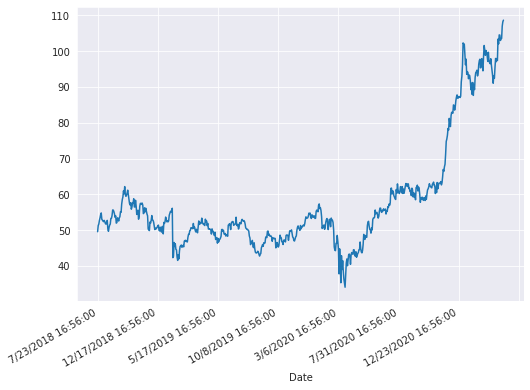

In [11]:
data.plot(subplots=True)

In [12]:
uni_data = data.values
print ("Dados: ", uni_data)
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
print ("Média: ", uni_train_mean)
uni_train_std = uni_data[:TRAIN_SPLIT].std()
print ("Desv. Padrão: ", uni_train_std)
uni_data = (uni_data-uni_train_mean)/uni_train_std
print ("Dados Norm: ", uni_data)

Dados:  [ 49.6   51.31  51.75  52.78  53.45  54.33  54.84  53.06  52.84  52.55
  52.4   52.75  52.4   51.84  51.71  52.28  52.76  50.41  49.72  50.8
  51.44  51.73  53.3   53.35  54.15  55.67  55.65  55.22  54.57  53.62
  54.05  52.    52.15  53.48  53.22  52.59  53.45  53.78  55.2   55.04
  57.34  58.58  59.32  61.01  60.2   62.2   60.01  59.48  59.82  60.4
  61.2   59.95  58.8   57.49  57.05  57.7   55.89  56.48  57.67  57.7
  58.8   56.5   56.53  58.37  56.75  54.43  54.61  55.6   53.1   53.87
  56.71  57.5   57.53  57.23  57.59  57.02  54.65  54.85  56.27  55.16
  56.15  55.37  54.53  54.04  50.35  50.12  49.92  52.3   52.    52.8
  54.11  52.88  52.8   52.3   51.29  50.2   50.6   50.37  50.6   50.88
  51.25  51.44  50.01  49.81  50.86  50.44  49.5   51.    51.09  49.
  52.19  51.91  52.41  53.69  53.1   52.38  52.6   52.35  52.65  54.23
  54.76  55.28  55.08  55.65  56.15  42.36  42.74  46.6   45.5   46.25
  44.68  44.52  42.46  41.59  43.16  42.02  44.3   45.49  45.66  45.88
  45

**Criação dos Datasets de Treinamento e Validação**'

* A função abaixo retorna a fração do dataset a ser utilizada sendo:

          * history_size: janela a ser observada
          * target_size: O exato momento a ser avaliado 



In [13]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [14]:
'''Tamanho da Janela do Historico'''
univariate_past_history = 20  #20 observacoes anteriores
future = univariate_future_target = 1  #a proxima observação 

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

Para efeito de visualização, vamos analisar as janelas de observações criadas e sua respectiva temperatura (label)

#Amostras: 452 #Labels:  452
Amostra[0]:
 [[ 0.92680591]
 [ 1.04099635]
 [ 0.64244932]
 [ 0.59319069]
 [ 0.52825887]
 [ 0.49467345]
 [ 0.57303944]
 [ 0.49467345]
 [ 0.36928787]
 [ 0.3401805 ]
 [ 0.46780511]
 [ 0.57527847]
 [ 0.04910682]
 [-0.10538613]
 [ 0.13642893]
 [ 0.27972674]
 [ 0.34465856]
 [ 0.696186  ]
 [ 0.70738114]
 [ 0.8865034 ]] 
Temperatura:  1.2223576403306784


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

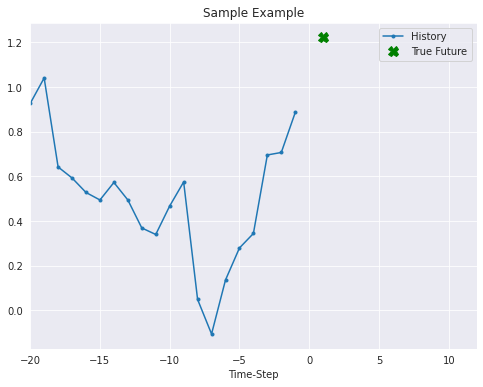

In [15]:
def create_time_steps(length):
  time_steps = []
  for i in range(-length, 0, 1):
    time_steps.append(i)
  return time_steps

def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'gX', 'ro']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
      future = delta
    else:
      future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
      if i:
        plt.plot(future, plot_data[i], marker[i], markersize=10,
                label=labels[i])
      else:
        plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

sample_id = 5
print("#Amostras:", len(x_train_uni),"#Labels: ", len(y_train_uni))
print ("Amostra[0]:\n", x_train_uni[sample_id],"\nTemperatura: ", y_train_uni[sample_id])
show_plot([x_train_uni[sample_id], y_train_uni[sample_id]], future, 'Sample Example')

### Baseline
Para efeitos comparativos, vamos criar um modelo de predição utilizando a média das últimas 20 observações. Este simples modelo nos revela como a média pode ser falha para prever séries temporais

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

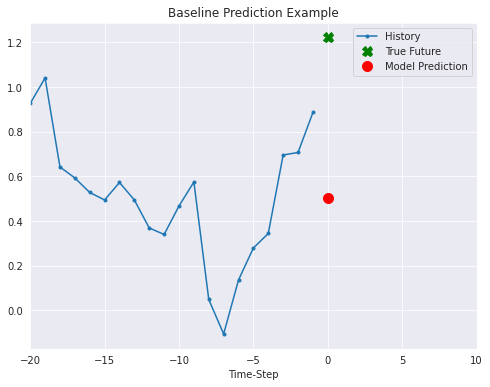

In [16]:
def baseline(history):
  return np.mean(history)

show_plot([x_train_uni[sample_id], y_train_uni[sample_id], baseline(x_train_uni[sample_id])], 0,
           'Baseline Prediction Example')

### Recurrent neural network (SimpleRNN and LSTM)

Definindo os datasets

In [46]:
BATCH_SIZE = 256
BUFFER_SIZE = 100

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

##Criando as arquiteturas

RNN

In [47]:
simple_rnn_model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(8, input_shape=(x_train_uni.shape[1], 
    x_train_uni.shape[2])),    
    tf.keras.layers.Dense(1)
])


simple_rnn_model.compile(optimizer='adam', loss='mae')

simple_rnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 8)                 80        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


LSTM

In [48]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=(x_train_uni.shape[1], 
    x_train_uni.shape[2])),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')


simple_lstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 8)                 320       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


## Treinamento

Para poupar tempo, cada epoca conterá apenas 200 amostras ao invés da base toda. Podemos alterar este número depois para ver o impacto.

In [49]:
EVALUATION_INTERVAL = 200
EPOCHS = 50

RNN

In [50]:
rnn_log = simple_rnn_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Epoch 1/50
200/200 [==============================] - 2s 6ms/step - loss: 0.8473 - val_loss: 5.5767
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 0.3404 - val_loss: 4.8475
Epoch 3/50
200/200 [==============================] - 1s 5ms/step - loss: 0.2915 - val_loss: 4.4978
Epoch 4/50
200/200 [==============================] - 1s 5ms/step - loss: 0.2800 - val_loss: 4.3097
Epoch 5/50
200/200 [==============================] - 1s 5ms/step - loss: 0.2748 - val_loss: 4.1837
Epoch 6/50
200/200 [==============================] - 1s 5ms/step - loss: 0.2698 - val_loss: 4.0615
Epoch 7/50
200/200 [==============================] - 1s 5ms/step - loss: 0.2655 - val_loss: 3.9821
Epoch 8/50
200/200 [==============================] - 1s 5ms/step - loss: 0.2628 - val_loss: 3.9333
Epoch 9/50
200/200 [==============================] - 1s 4ms/step - loss: 0.2604 - val_loss: 3.9352
Epoch 10/50
200/200 [==============================] - 1s 4ms/step - loss: 0.2580 - val_loss: 3.9155

LSTM

In [51]:
lstm_log = simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Epoch 1/50
200/200 [==============================] - 4s 12ms/step - loss: 0.5057 - val_loss: 4.5130
Epoch 2/50
200/200 [==============================] - 2s 10ms/step - loss: 0.3035 - val_loss: 4.2539
Epoch 3/50
200/200 [==============================] - 2s 10ms/step - loss: 0.2809 - val_loss: 4.0452
Epoch 4/50
200/200 [==============================] - 2s 10ms/step - loss: 0.2746 - val_loss: 3.9841
Epoch 5/50
200/200 [==============================] - 2s 10ms/step - loss: 0.2707 - val_loss: 4.0064
Epoch 6/50
200/200 [==============================] - 2s 10ms/step - loss: 0.2692 - val_loss: 3.9865
Epoch 7/50
200/200 [==============================] - 2s 10ms/step - loss: 0.2678 - val_loss: 3.9724
Epoch 8/50
200/200 [==============================] - 2s 10ms/step - loss: 0.2661 - val_loss: 4.0199
Epoch 9/50
200/200 [==============================] - 2s 10ms/step - loss: 0.2623 - val_loss: 4.1086
Epoch 10/50
200/200 [==============================] - 2s 10ms/step - loss: 0.2579 - val_lo

##Visualização do Treinamento

In [52]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

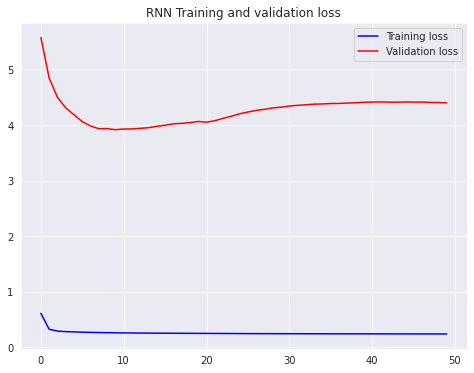

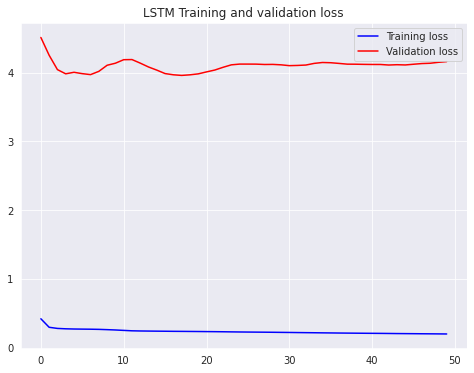

In [53]:
 plot_train_history(rnn_log,
                   'RNN Training and validation loss')
 plot_train_history(lstm_log,
                   'LSTM Training and validation loss')

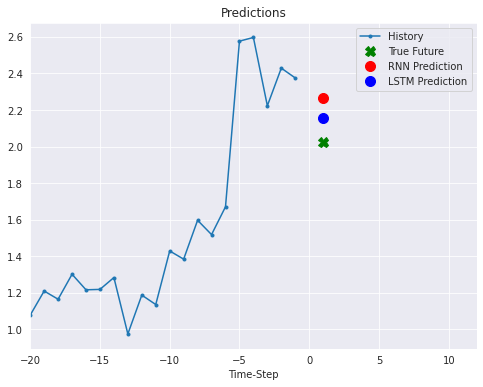

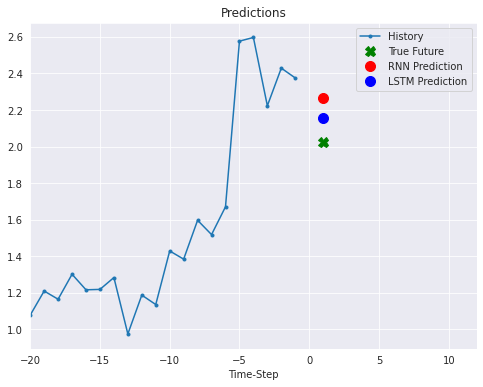

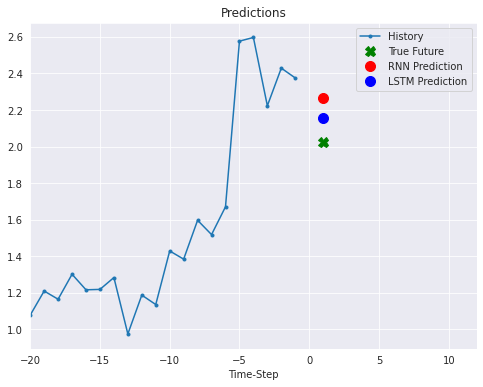

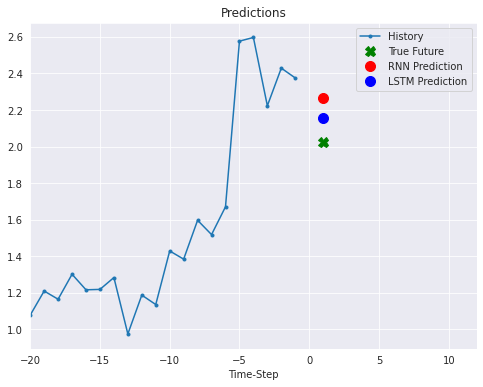

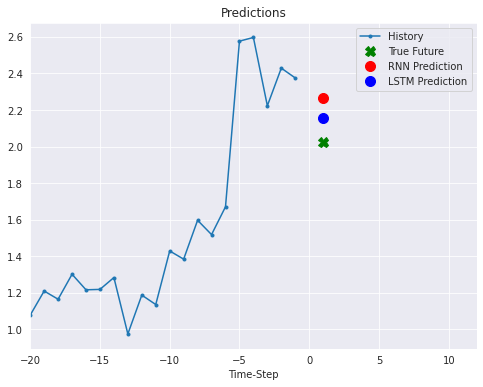

In [54]:
def plot_preds(plot_data, delta=0):
    labels = ['History', 'True Future', 'RNN Prediction','LSTM Prediction']
    marker = ['.-', 'gX', 'ro' , 'bo']
    time_steps = create_time_steps(plot_data[0].shape[0])
    

    future = delta

    plt.title('Predictions')
    for i, x in enumerate(plot_data):
      if i:
        plt.plot(future, plot_data[i], marker[i], markersize=10,
                label=labels[i])
      else:
        plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

for x, y in val_univariate.take(5):
  plot = plot_preds([x[0].numpy(), y[0].numpy(),
                    simple_rnn_model.predict(x)[0], simple_lstm_model.predict(x)[0]], future)
  plot.show()

In [55]:
#TODO Calcule uma taxa de erro

err_rnn=0
err_lstm=0

print(x_val_uni.shape)
N = 1000
for x, y in val_univariate.take(N):
  err_rnn += abs(y[0].numpy() - simple_rnn_model.predict(x)[0])
  err_lstm += abs(y[0].numpy() - simple_lstm_model.predict(x)[0])
  
err_rnn = err_rnn/N
err_lstm = err_lstm/N
  
print(err_rnn)
print(err_lstm)
  

(182, 20, 1)
[0.23718339]
[0.12813748]
